In [1]:
from General import functies as functies
from General import classes as classes
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#metingen van de golflengte
x, N, lamba = sp.symbols('x N lambda')
begin =  np.array([10,10,0,10,20,5]) *10**(-6) #in m
eind = np.array([20,20,10,20,30,15])*10**(-6)
delta = eind-begin
fouten_afstand = np.sqrt(2)*np.full(np.shape(delta), 0.5e-6)
aantalstrepen = np.array([34,33,32,34,31,31])

strepencount = classes.datapunt(np.mean(aantalstrepen), np.sqrt(np.var(aantalstrepen)), N)
afstand = classes.datapunt(1e-5, np.sqrt(2)*0.5e-6, x, 'Uniform')

golflengte = afstand*2 * (strepencount**(-1))
print(golflengte)

"""
fouten_N = np.sqrt(aantalstrepen)
vergelijking = classes.vergelijking(2*x/N, [x, N])
lambdalijst = []
for indx in range(len(fouten_afstand)):
    xpunt = classes.datapunt(delta[indx], fouten_afstand[indx], x, 'U')
    Npunt = classes.datapunt(aantalstrepen[indx], fouten_N[indx], N, 'Poisson')
    lambdalijst.append(vergelijking.evaluate([xpunt, Npunt], None,lamba))
golflengte = functies.mu_sigma(lambdalijst)
display(golflengte)
functies.latex_print_datapunt(golflengte)"""

6.153846153846154e-07
datapunt: x*N = [6.153846153846155e-07, 3.462423393687052e-08, 'Normaal']


datapunt: lambda_gem = [6.13594803694904e-7, 4.51501054430267e-8, 'Normaal']

$lambda_gem = (61 \pm 4)\cdot 10^{-8}$


functie: <function find_sigma_values_2D.<locals>.<lambda> at 0x000001BF1DF1B880>
Betrouwbaarheids intervallen voor de parameters: 
[[1.0002479655376695, 1.0002552621201282]]
---------------------------
n_0 heeft als waarde: 1.0003 + 3.6557e-06 - 3.6408e-06 met 68% betrouwbaarheidsinterval: [1.0002, 1.0003] 
De p-waarde voor de hypothese test dat het model zinvol is, wordt gegeven door: 0.99384
De gereduceerde chi^2 waarde is: 0.44865


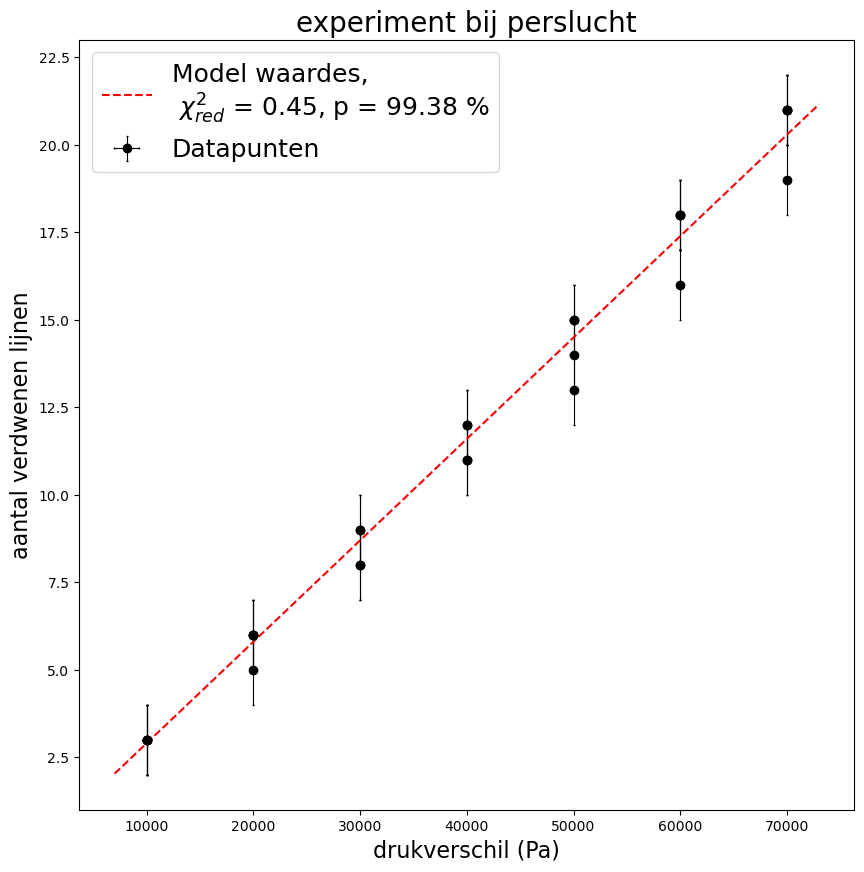

In [3]:
#fitten van de luchtdruk
def n_model(druk, params):
    L = 38.4e-3
    n_val = params[0]
    lamba = golflengte.get_val()
    omgevingsparameters = 273.15/(293*1013e2) # = T_0/p_0*1/T => 1013hPa
    N = 2*L/lamba * (n_val-1)*omgevingsparameters*druk
    N = np.array(N, dtype = 'float64')
    return N

def invals(x,y):
    return [1.0002]
druklijst = [10,20,30,40,50,60,70]
drukmatrix = np.array(druklijst+ druklijst+ druklijst+ druklijst,dtype='float64')*10**3
drukvar = np.full(np.shape(drukmatrix), (1e3)**2/12,dtype='float64')
lijnen = np.array( [3, 5, 8, 11, 14, 18, 21]+[3, 6, 8, 11, 13, 16, 19]+ [3, 6, 9, 12, 15, 18, 21]+ [3, 6, 9, 12, 15, 18, 21],dtype='float64')
lijnenfout = np.full(np.shape(lijnen),1)
lijnenfout[0] = 1
fitwaarden = functies.fit_2D(['n_0'], n_model, invals, drukmatrix, lijnen, drukvar, lijnenfout, 
                             x_as_titel='drukverschil (Pa)', y_as_titel='aantal verdwenen lijnen', titel = 'experiment bij perslucht')

functie: <function find_sigma_values_2D.<locals>.<lambda> at 0x000001BF1DDB4540>
Betrouwbaarheids intervallen voor de parameters: 
[[1.0003852543701721, 1.0003928927767656]]
---------------------------
n_0 heeft als waarde: 1.0004 + 3.8265e-06 - 3.8119e-06 met 68% betrouwbaarheidsinterval: [1.0004, 1.0004] 
De p-waarde voor de hypothese test dat het model zinvol is, wordt gegeven door: 0.26472
De gereduceerde chi^2 waarde is: 1.1565


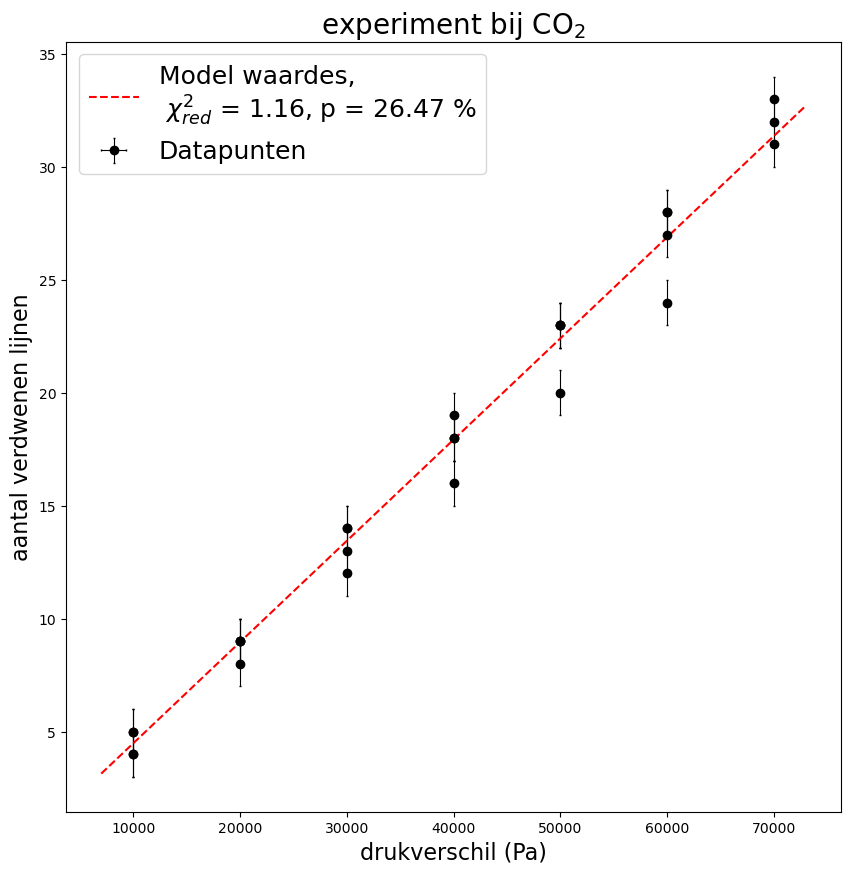

In [4]:
#fitten van de CO2-druk
def n_model(druk, params):
    L = 38.4e-3
    n_val = params[0]
    lamba = golflengte.get_val()
    omgevingsparameters = 273.15/(293*1013e2) # = T_0/p_0*1/T => 1013hPa
    N = 2*L/lamba * (n_val-1)*omgevingsparameters*druk
    N = np.array(N, dtype = 'float64')
    return N

def invals(x,y):
    return [1.0002]
druklijst = [10,20,30,40,50,60,70]
drukmatrix = np.array(druklijst+ druklijst[:-1]+ druklijst+ druklijst,dtype='float64')*10**3
drukvar = np.full(np.shape(drukmatrix), (1e3)**2/12,dtype='float64')
lijnen = np.array( [5, 9, 13, 18, 23, 27, 32]+[4, 8, 12, 16, 20, 24]+ [4, 9, 14, 19, 23, 28, 31]+ [5, 9, 14, 18, 23, 28, 33],dtype='float64')
lijnenfout = np.full(np.shape(lijnen),1)
lijnenfout[0] = 1
fitwaarden = functies.fit_2D(['n_0'], n_model, invals, drukmatrix, lijnen, drukvar, lijnenfout, 
                             x_as_titel='drukverschil (Pa)', y_as_titel='aantal verdwenen lijnen', titel = 'experiment bij CO$_2$')